In [1]:
#pip install xgboost

In [2]:
#pip install yellowbrick

In [3]:
# Libs para manipular dados
import pandas as pd
import numpy as np

In [4]:
# Lib Gráfica
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Biblioteca do XGbossting
import xgboost
print(f'Versão do XGBoost: {xgboost.__version__}')

Versão do XGBoost: 2.0.0


In [6]:
# Função para criar dataset
from sklearn.datasets import make_classification

In [7]:
# Vetores
Eixo_x, Eixo_y = make_classification(
    # Numero de amostras
    n_samples=2000,
    # Quantidade de Features da base
    n_features=10,
    # Informações nas Features
    n_informative=5,
    # Features redudantes
    n_redundant=5,
    # Determinar flag de aleatório
    random_state=10)
    # Dimensão
print( Eixo_x.shape, Eixo_y.shape)

(2000, 10) (2000,)


In [8]:
# Criando uma tabela para melhor visualização
# Função com uma lista alfabética
from string import ascii_uppercase as Lista_Alfabetica

In [9]:
# Nomear as colunas e filtrar até a letra igual numero de colunas
Nome_Colunas = list( Lista_Alfabetica )
Nome_Colunas = Nome_Colunas[ 0:Eixo_x.shape[1] ]

In [10]:
# Criando a Tabela
Base_Dados = pd.DataFrame( Eixo_x, columns=Nome_Colunas )
Base_Dados['Target'] = Eixo_y

In [11]:
# Verificar
Base_Dados.head()

,A,B,C,D,E,F,G,H,I,J,Target
0,1.018674,0.492910,-0.612662,-0.434648,-0.710630,0.583885,0.242033,-1.404537,0.155692,1.244273,1
1,1.496352,1.083928,-0.872311,0.009669,-1.191315,-0.679902,-0.277253,-0.663639,-1.391981,-0.417254,0
2,3.107569,-1.504490,-2.495753,-1.236926,1.686955,1.717586,2.243044,0.866690,0.743881,4.302089,0
3,1.484106,1.789700,0.025450,-3.502337,1.852875,-1.728208,2.545017,-0.157315,-0.341909,-0.615653,1
4,-0.832004,0.739505,-0.404945,-0.694289,1.847033,0.519082,0.038851,0.712021,0.924358,-0.335095,0


In [12]:
# Analisar nossa classe previsora [ Target ]
# Gráfico do Yellow brick - Balanço de Classe
from yellowbrick.target import ClassBalance

Text(0.5, 1.0, 'Análise da Classe [Target]')

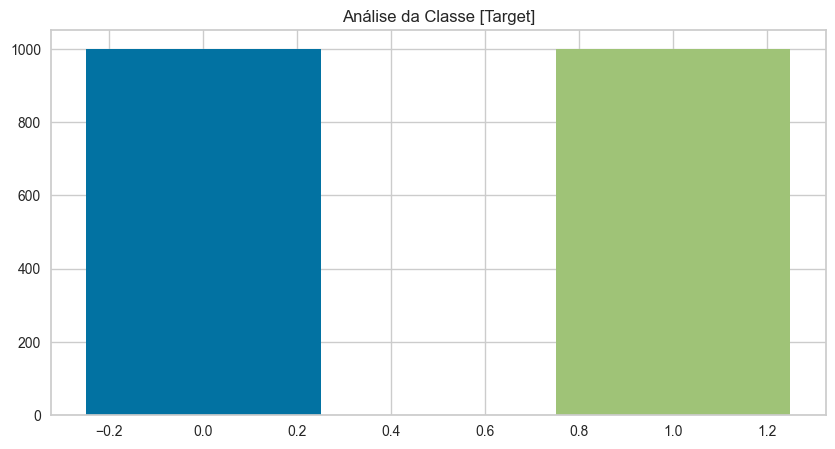

In [13]:
# Tamanho do gráfico
plt.figure( figsize=(10, 5) )
# Instanciando o gráfico
Visualizador = ClassBalance( labels=[0,1] )
Visualizador.fit( Eixo_y )
# titulo
plt.title('Análise da Classe [Target]')

In [14]:
# Analisar os dados de características
# Gráfico do Yellow brick - Coordenadas paralelas
from yellowbrick.features import ParallelCoordinates

Text(0.5, 1.0, 'Coordenadas paralelas -[Características]')

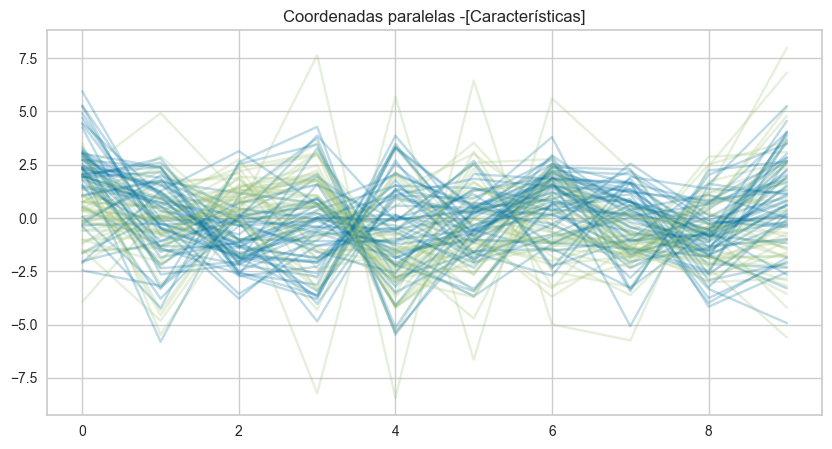

In [15]:
# Tamanho do gráfico
plt.figure( figsize=(10, 5) )
# Parâmetros para o gráfico
Features = Nome_Colunas
Classes = [0, 1]
# Instanciando o gráfico
Visualizador_02 = ParallelCoordinates( classes=Classes, features=Features, sample=0.05, shuffle=True)
Visualizador_02.fit_transform( Eixo_x, Eixo_y )
# Titulo
plt.title('Coordenadas paralelas -[Características]')

In [16]:
# Divisão dos dados
# Função sklearn para dividir os dados
from sklearn.model_selection import train_test_split

In [17]:
# Vetores
x_Treino, x_Teste, y_Treino, y_Teste = train_test_split(
    # características
    Eixo_x,
    # previsor
    Eixo_y,
    # tamanho da amostra
    test_size=0.25,
    # flag do aleatório
    random_state=10 )

In [18]:
# Dimensão
print( f'Treinar o modelo com { x_Treino.shape[0] } registros' )
print( f'Testar com { x_Teste.shape[0] } registros')

Treinar o modelo com 1500 registros
Testar com 500 registros


In [19]:
# Função do modelo
from xgboost import XGBClassifier

In [20]:
# Atribuindo o modelo
Modelo_XGB = XGBClassifier(
    # Numero de arvores no algoritmo
    n_estimators=500,
    # definido para controlar a ponderação de novas árvores adicionadas ao modelo
    learning_rate=0.1,
    # Profundidade máxima de uma árvore
    # Detalhe XGBoost consome muita memoria, então quanto maior mais memoria
    max_depth=5,
    # Soma mínima do peso da instância
    min_child_weight=1,
    # Redução de perda mínima necessária para fazer uma partição adicional em um nó folha da árvore.
    # Quanto maior 'gamma' for, mais conservador será o alg oritmo
    gamma=0,
    # Proporção de subamostra das instâncias de treinamento.
    subsample=0.8,
    # Denota a fração de colunas a serem amostras aleatórias para cada árvore.
    colsample_bytree=0.8,
    )

In [21]:
# Fitar o modelo
Modelo_XGB.fit( x_Treino, y_Treino )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
# Avaliar o modelo - Matriz de Confusão
# Criar as previsões
Previsoes = Modelo_XGB.predict( x_Teste )

In [23]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
print('Matriz de Confusão: \n', confusion_matrix( y_Teste, Previsoes ), '\n' )

Matriz de Confusão: 
 [[233  19]
 [ 18 230]] 



In [24]:
# Gráfico do Yellow brick - Matrix de Confusão
from yellowbrick.classifier import ConfusionMatrix

In [25]:
# Tamanho do gráfico
plt.figure( figsize=(10, 5) )
# Atribuir a Matrix
Matriz_Confusao = ConfusionMatrix(Modelo_XGB, classes=[0, 1])

<Figure size 1000x500 with 0 Axes>

ConfusionMatrix(ax=<Axes: >, classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f463249d450>,
                estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=0.8, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=0, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.1, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=5,
                                        max_leaves=None, min_child_weight=1,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=500,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=None, ...))

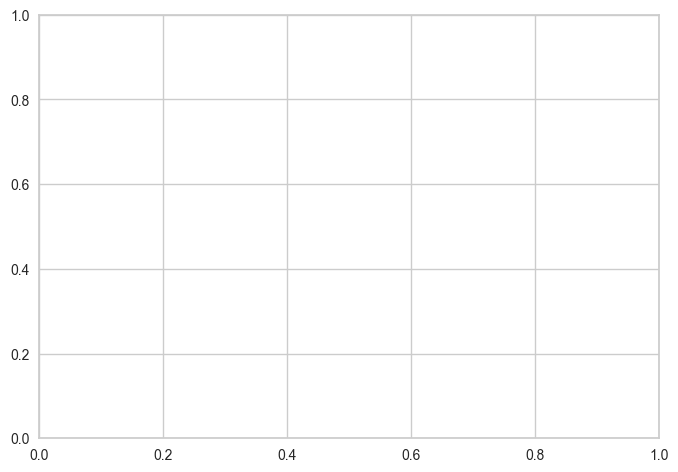

In [26]:
# Fitar o modelo
Matriz_Confusao.fit(x_Treino, y_Treino)

In [27]:
# Calcular o score
Matriz_Confusao.score(x_Teste, y_Teste)

0.926

In [28]:
# Plot do gráfico
Matriz_Confusao.show()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
# Relatorio de Classificação
from sklearn.metrics import classification_report
print('Relatório de Classificação: \n', classification_report( y_Teste, Previsoes ) )

Relatório de Classificação: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       252
           1       0.92      0.93      0.93       248

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [30]:
# Gráfico do Yellow brick - Report de Classificação
from yellowbrick.classifier import ClassificationReport

In [31]:
# Tamanho do gráfico
plt.figure( figsize=(10, 5) )
# Atribuir o Report
Class_Report = ClassificationReport(Modelo_XGB, classes=[0, 1], support=True)

<Figure size 1000x500 with 0 Axes>

ClassificationReport(ax=<Axes: >, classes=[0, 1],
                     cmap=<matplotlib.colors.ListedColormap object at 0x7f463205b990>,
                     estimator=XGBClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=0.8, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=0,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.1, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=5,
                                             max_leaves=None,
                                             min_child_weight=1, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=500, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...),
                     support=True)

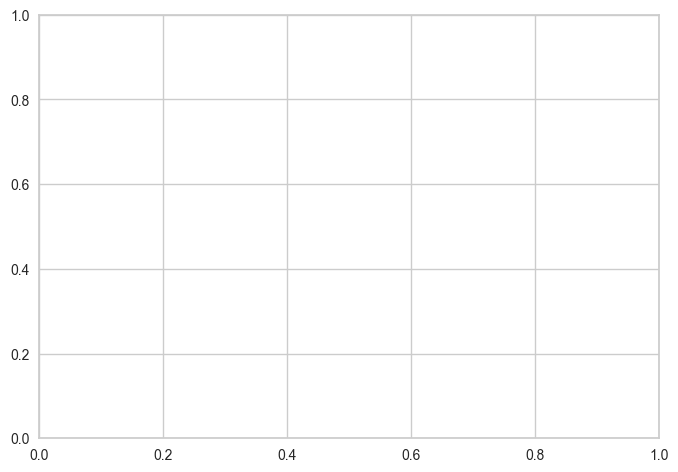

In [32]:
# Fitar o modelo
Class_Report.fit(x_Treino, y_Treino)

In [33]:
# Calcular o score
Class_Report.score(x_Teste, y_Teste)

0.926

<Figure size 800x550 with 0 Axes>

In [34]:
# Plot do gráfico
Class_Report.show();

<Figure size 800x550 with 0 Axes>

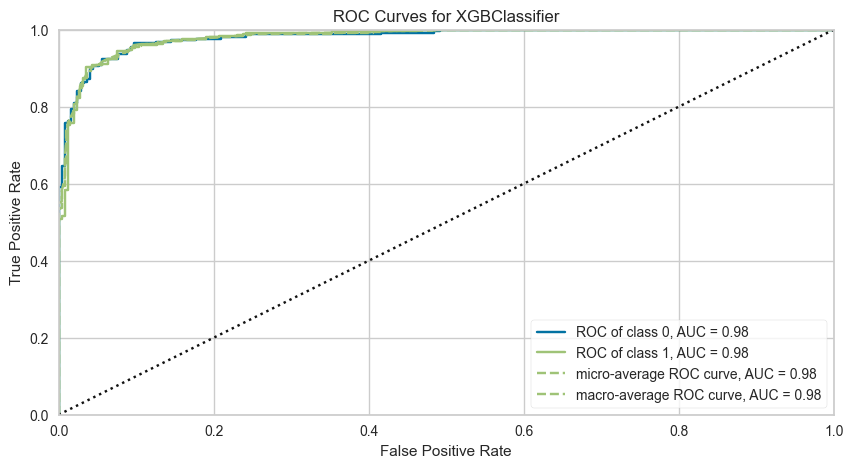

In [35]:
# Gráfico do Yellow brick - Curva ROC
from yellowbrick.classifier import ROCAUC
# Tamanho do gráfico
plt.figure( figsize=(10, 5) )
# Atribuir o Report
Curva_ROC = ROCAUC(Modelo_XGB, classes=[0, 1])
# Fitar o modelo
Curva_ROC.fit(x_Treino, y_Treino)
# Calcular o score
Curva_ROC.score(x_Teste, y_Teste)
# Plot do gráfico
Curva_ROC.show();

In [36]:
# Funções
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# Atribuindo o modelo
Modelo_XGB_v2 = XGBClassifier()
# Atrinuindo o modelo - Validação cruzada
Validacao_Cruzada = RepeatedStratifiedKFold(
    # Numero de splits
    n_splits=10,
    # Quantidade de repetições
    n_repeats=3,
    # Flag do aleatorio
    random_state=10 )
    # Fitando o modelo
Resultado_Scores = cross_val_score(
    # Modelo
    Modelo_XGB_v2,
    # Caracteristicas
    Eixo_x,
    # Previsor
    Eixo_y,
    # Metrica de avaliação
    scoring='accuracy',
    # Validação cruzado
    cv=Validacao_Cruzada,
    # Numero de jobs em paralelo [-1 significa usar todos os processadores]
    n_jobs=-1 )
# Avaliando o 'ACCURACY' final
print(f'Média da Acurácia nos Scores: { np.mean(Resultado_Scores) } ')

Média da Acurácia nos Scores: 0.9365 
